In [1]:
import cv2
import pickle
import argparse
import logging
import os
import torch.nn as nn
import matplotlib.pyplot as plt

import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms

import pickle
from unet import UNet, InitNet
from utils.data_vis import plot_img_and_mask
from utils.dataset import BasicDataset

In [2]:
pickle_file_path = './val_output_pickle_file'
pickle_file = open(pickle_file_path, 'rb')
predict_result_dict = pickle.load(pickle_file)
pickle_file.close()

scorefile = open('scoreFile.pickle', 'rb')
scoreList = pickle.load(scorefile)
scorefile.close()

scorefileVal = open('scoreFileVal.pickle', 'rb')
scoreListVal = pickle.load(scorefileVal)
scorefileVal.close()

In [682]:
pickle_file_path = './train_set_visualization_fcn.pickle'
pickle_file = open(pickle_file_path, 'rb')
predict_result_dict_fcn = pickle.load(pickle_file)
pickle_file.close()

scorefile = open('scoreFile_fcn.pickle', 'rb')
scoreList_fcn = pickle.load(scorefile)
scorefile.close()

In [3]:
class_label = predict_result_dict['class_label']
class_output = predict_result_dict['class_output']
component_label = predict_result_dict['component_label']
input_mixture = predict_result_dict['mixture']
component_output = predict_result_dict['component_output']

In [38]:
def component_comparsion(predict_result_dict, component_index, score_list):
    input_mixture = predict_result_dict['mixture']
    component_output = predict_result_dict['component_output']
    component_label = predict_result_dict['component_label']
    class_label = predict_result_dict['class_label']
    class_output = predict_result_dict['class_output']
    
    #plt.figure()
    batch_size = 20
    sample_length = component_label.shape[-2]

    component_output_all = np.zeros((component_label.shape[-1], sample_length*batch_size))
    component_label_all = np.zeros((component_label.shape[-1], sample_length*batch_size))
    input_mixture_all = np.zeros((component_label.shape[-1], sample_length*batch_size))
    
    for batch_index in range(batch_size):
        component_output_all[:, batch_index*sample_length:(batch_index+1)*sample_length] = np.transpose(np.exp(component_output.detach().numpy()[batch_index, component_index,:,:]))
        component_label_all[:, batch_index*sample_length:(batch_index+1)*sample_length] = np.transpose(np.exp(component_label.detach().numpy()[batch_index, component_index,:,:]))
        input_mixture_all[:, batch_index*sample_length:(batch_index+1)*sample_length] = np.transpose(np.exp(input_mixture.detach().numpy()[batch_index,:,:]))
    
    
    fig, axs = plt.subplots(2, 3, figsize=(30,15))
    
    pcolor = axs[0, 0].pcolor(component_output_all, vmin = 0, vmax = 50)
    axs[0, 0].set_title(f'Predicted Output: Component {component_index}')
    axs[0, 0].set_ylabel('Frequency')
    axs[0, 0].set_xlabel('Time')
    fig.colorbar(pcolor, ax=axs[0, 0])
    
    pcolor = axs[0, 1].pcolor(component_label_all, vmin = 0, vmax = 50)
    axs[0, 1].set_title(f'Label: Component {component_index}')
    axs[0, 1].set_ylabel('Frequency')
    axs[0, 1].set_xlabel('Time')
    fig.colorbar(pcolor, ax=axs[0, 1])
    
    pcolor = axs[0, 2].pcolor(input_mixture_all, vmin = 0, vmax = 50)
    axs[0, 2].set_title(f'Mixture Signal')
    axs[0, 2].set_ylabel('Frequency')
    axs[0, 2].set_xlabel('Time')
    fig.colorbar(pcolor, ax=axs[0, 2])
    
    try:
        pcolor = axs[1, 0].pcolor(np.transpose(class_output.detach().numpy()), vmin = 0, vmax = 1)
        axs[1, 0].set_title(f'Classification Result')
        axs[1, 0].set_ylabel('Component Index')
        axs[1, 0].set_xlabel('Sample')
        fig.colorbar(pcolor, ax=axs[1, 0])
    
        pcolor = axs[1, 1].pcolor(np.transpose(class_label.detach().numpy()[:,0:1]), vmin = 0, vmax = 1)
        axs[1, 1].set_title(f'Classification Label')
        axs[1, 1].set_ylabel('Component Index')
        axs[1, 1].set_xlabel('Sample')
        fig.colorbar(pcolor, ax=axs[1, 1])
    
        pcolor = axs[1, 2].plot(score_list)
        axs[1, 2].set_title('Loss vs. Epochs')
        axs[1, 2].set_ylabel('Batch MSE Loss')
        axs[1, 2].set_xlabel('Epochs')
    
    except:
        pass
    
    
    
    plt.savefig('./val_set.png')
    
    return component_output_all
    

component_output_all = component_comparsion(predict_result_dict, 0, scoreList)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

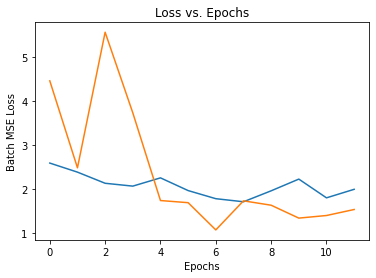

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('Loss vs. Epochs')
ax1.set_ylabel('Batch MSE Loss')
ax1.set_xlabel('Epochs')
ax1.plot(scoreList[1:])
ax1.plot(scoreListVal[1:])
 
plt.savefig('./lossFig.png')

In [20]:
scoreList

[0.23826461029052742, 0.09066849637031558, 0.08485429310798648]

In [21]:
scoreListVal

[2626.79248046875, 14.35825777053833, 8.988295078277588]

In [631]:
component_output.shape

torch.Size([100, 1, 20, 128])

20
(128, 400)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)
(128, 20)


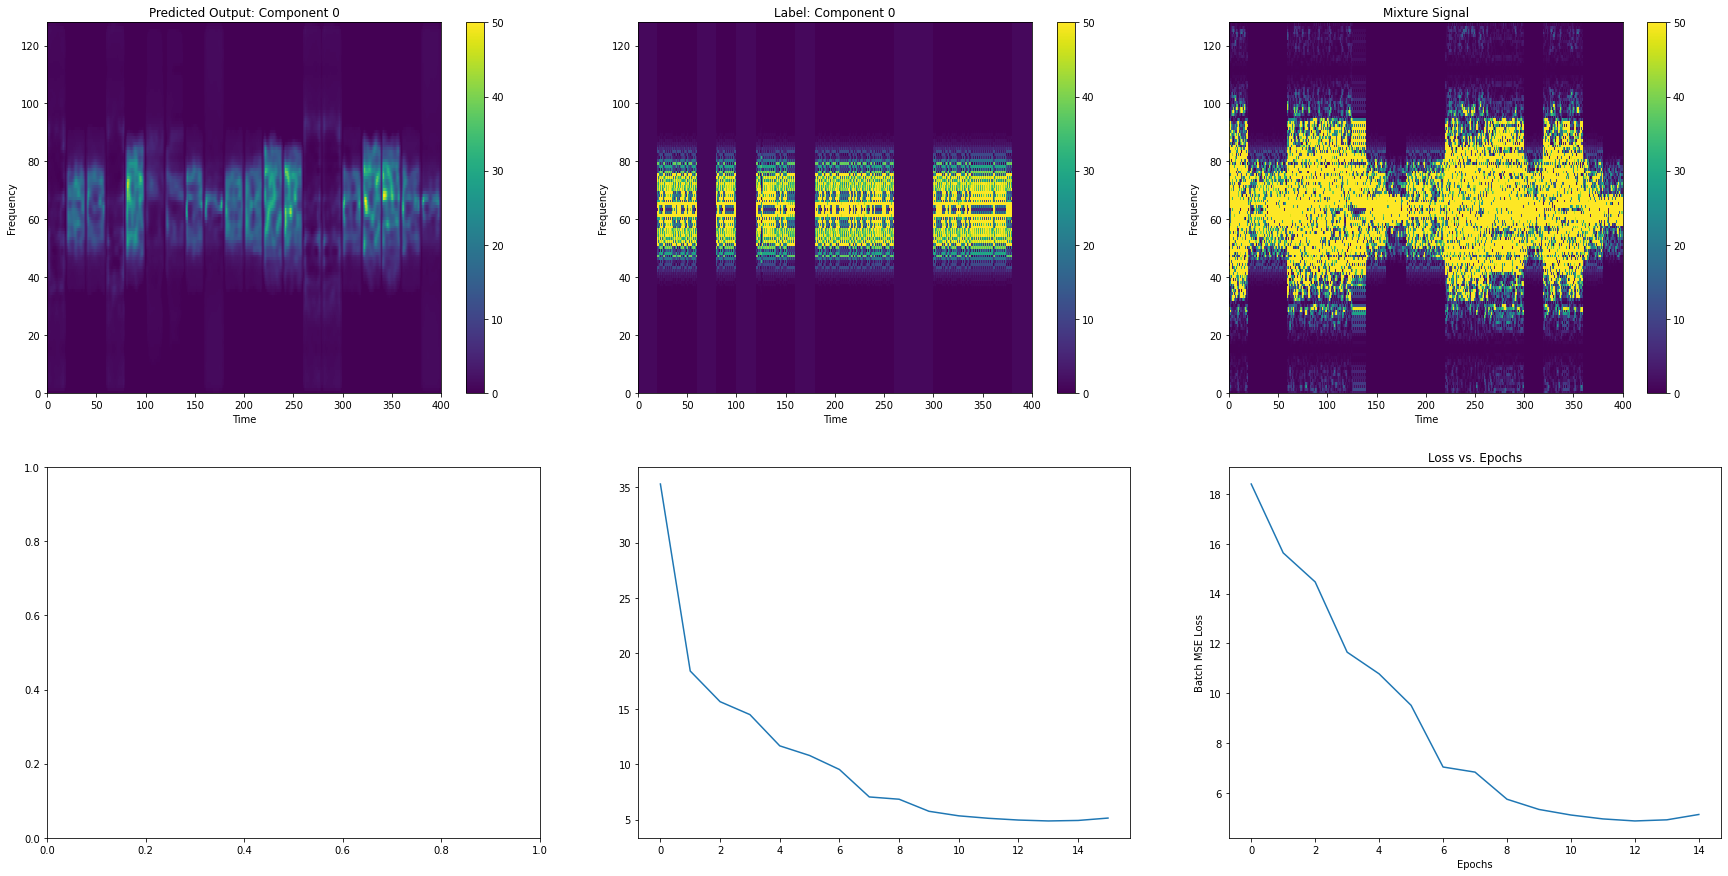

In [44]:
def component_comparsion(predict_result_dict, component_index, score_list):
    input_mixture = predict_result_dict['mixture']
    component_output = predict_result_dict['component_output']
    component_label = predict_result_dict['component_label']
    class_label = predict_result_dict['class_label']
    class_output = predict_result_dict['class_output']
    
    #plt.figure()
    batch_size = 20
    sample_length = component_output.shape[-2]
    print(sample_length)

    component_output_all = np.zeros((component_output.shape[-1], sample_length*batch_size))
    component_label_all = np.zeros((component_output.shape[-1], sample_length*batch_size))
    input_mixture_all = np.zeros((component_output.shape[-1], sample_length*batch_size))
    print(input_mixture_all.shape)
    
    for batch_index in range(batch_size):
        component_output_all[:, batch_index*sample_length:(batch_index+1)*sample_length] = np.transpose(np.exp(component_output.cpu().detach().numpy()[batch_index, component_index,:,:]))
        component_label_all[:, batch_index*sample_length:(batch_index+1)*sample_length] = np.transpose(np.exp(component_label.cpu().detach().numpy()[batch_index, component_index,:,:]))
        input_mixture_all[:,batch_index*sample_length:(batch_index+1)*sample_length] = np.transpose(np.exp(input_mixture.cpu().detach().numpy()[batch_index,0,:]))
        print(np.transpose(np.exp(input_mixture.cpu().detach().numpy()[batch_index,0,:])).shape)
    
    fig, axs = plt.subplots(2, 3, figsize=(30,15))
    
    pcolor = axs[0, 0].pcolor(component_output_all, vmin = 0, vmax = 50)
    axs[0, 0].set_title(f'Predicted Output: Component {component_index}')
    axs[0, 0].set_ylabel('Frequency')
    axs[0, 0].set_xlabel('Time')
    fig.colorbar(pcolor, ax=axs[0, 0])
    
    pcolor = axs[0, 1].pcolor(component_label_all, vmin = 0, vmax = 50)
    axs[0, 1].set_title(f'Label: Component {component_index}')
    axs[0, 1].set_ylabel('Frequency')
    axs[0, 1].set_xlabel('Time')
    fig.colorbar(pcolor, ax=axs[0, 1])
    
    pcolor = axs[0, 2].pcolor(input_mixture_all, vmin = 0, vmax = 50)
    axs[0, 2].set_title(f'Mixture Signal')
    axs[0, 2].set_ylabel('Frequency')
    axs[0, 2].set_xlabel('Time')
    fig.colorbar(pcolor, ax=axs[0, 2])
    
    try:
        pcolor = axs[1, 0].pcolor(np.transpose(class_output.detach().numpy()), vmin = 0, vmax = 1)
        axs[1, 0].set_title(f'Classification Result')
        axs[1, 0].set_ylabel('Component Index')
        axs[1, 0].set_xlabel('Sample')
        fig.colorbar(pcolor, ax=axs[1, 0])
    
        
    
    except:
        pass
    
    pcolor = axs[1, 1].plot(score_list)
    axs[1, 2].set_title('Loss vs. Epochs')
    axs[1, 2].set_ylabel('Batch MSE Loss')
    axs[1, 2].set_xlabel('Epochs')
    
    
    pcolor = axs[1, 2].plot(score_list[1:])
    axs[1, 2].set_title('Loss vs. Epochs')
    axs[1, 2].set_ylabel('Batch MSE Loss')
    axs[1, 2].set_xlabel('Epochs')
    
    
    plt.savefig('./comparsion_result.png')
    
    return component_output_all, input_mixture_all

component_output_all, input_mixture_all = component_comparsion(predict_result_dict, 0, scoreList)

In [423]:
input_mixture_all

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [507]:
input_string = 'hell0|hellp'
options = input_string.split('|')

In [510]:
import random
random.choice(options)

'hellp'

In [571]:
import random

# Takes in a section of the string 
# and randomly choose from one of the options
def option(input_string_section):
    options = input_string_section.split('|')
    return random.choice(options)

# Use a stack to simplify the string: 
# when encounter a '}' pop the last '{'
def sentence_generation(input_string):
    stack = []
    for char_index in range(len(input_string)):
        if input_string_list[char_index] == '{':
            stack.append(char_index)
        elif input_string_list[char_index] == '}':
            left_bracket_index = stack.pop()
            right_bracket_index = char_index
            # Process ths substring, pad with '@' to make sure index is still right
            
            left = input_string[:left_bracket_index]
            mid = option(input_string[left_bracket_index+1:right_bracket_index])
            right = input_string[right_bracket_index+1:]
            print(left, mid, right)
            
            input_string = left + mid + (right_bracket_index-left_bracket_index- len(mid) + 1) * '@' + right
            
    return input_string.replace('@', '')

In [601]:
import random

# Takes in a section of the string 
# and randomly choose from one of the options
def option(input_string_section):
    options = input_string_section.split('|')
    return random.choice(options)

# Use a stack to simplify the string: 
# when encounter a '}' pop the last '{'
def sentence_generation(input_string):
    stack = []
    for char_index in range(len(input_string)):
        # Store the '{' into the stack
        if input_string[char_index] == '{':
            stack.append(char_index)
        # pop from the stack when encounter '}'
        elif input_string[char_index] == '}':
            left_bracket_index = stack.pop()
            right_bracket_index = char_index
            
            # Process ths substring, pad with '@' to make sure index is still right
            left_string = input_string[:left_bracket_index]
            right_string = input_string[right_bracket_index+1:]
            mid = option(input_string[left_bracket_index+1:right_bracket_index])
            padding = (right_bracket_index - left_bracket_index - len(mid) + 1)*'@'
            
            input_string = left_string + mid + padding + right_string

    return input_string.replace('@', '')

input_string = "{I'm|I am} {currently|} working on this {{online|Cortx} interview|test}, {I'll|I will} be {finishing|completing} this problem with ease!"
sentence_generation(input_string)      

                

"I'm  working on this test, I'll be completing this problem with ease!"

In [525]:
type(input_string_list)

list

In [574]:
import random

# Takes in a section of the string 
# and randomly choose from one of the options
def option(input_string_section):
    options = input_string_section.split('|')
    return random.choice(options)

# Use a stack to simplify the string: 
# when encounter a '}' pop the last '{'
def sentence_generation(input_string):
    stack = []
    for char_index in range(len(input_string)):
        # Store the '{' into the stack
        if input_string[char_index] == '{':
            stack.append(char_index)
        # pop from the stack when encounter '}'
        elif input_string[char_index] == '}':
            left_bracket_index = stack.pop()
            right_bracket_index = char_index
            # Process ths substring, pad with '@' to make sure index is still right
            
            left_string = input_string[:left_bracket_index]
            right_string = input_string[right_bracket_index+1:]
            mid = option(input_string[left_bracket_index+1:right_bracket_index])
            padding = (right_bracket_index - left_bracket_index - len(mid) + 1)*'@'
            
            input_string = left_string + mid + padding + right_string

    return input_string.replace('@', '')

In [532]:
option(''.join(input_string_list[1:9]))

"I'm"